In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns', None)

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df5 = pd.read_csv('df5_low.csv')
df5

,Unnamed: 0,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,0,221900.0,1180,5650,1.0,0.0,0.0,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,5,257500.0,1715,6819,2.0,0.0,0.0,1715,0.0,1995,0.0,98003,2238,6819,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,6,291850.0,1060,9711,1.0,0.0,0.0,1060,0.0,1963,0.0,98198,1650,9711,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,7,229500.0,1780,7470,1.0,0.0,0.0,1050,730.0,1960,0.0,98146,1780,8113,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,18,230000.0,1250,9774,1.0,0.0,0.0,1250,0.0,1969,0.0,98003,1280,8850,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,20396,249000.0,1260,1125,2.0,0.0,0.0,810,450.0,2011,0.0,98106,1260,1172,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4375,20404,305000.0,1590,2656,2.0,0.0,0.0,1220,370.0,2009,0.0,98106,1590,2306,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4376,20415,230000.0,1140,1201,2.0,0.0,0.0,1140,0.0,2014,0.0,98108,1210,1552,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4377,20427,270000.0,1870,5000,2.0,0.0,0.0,1870,0.0,2009,0.0,98042,2170,5399,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [12]:
df5 = df5.rename(columns={'bath_0.75':'bath_0_75', 'bath_1.0':'bath_1_0', 'bath_1.25':'bath_1_25', \
                                        'bath_1.5':'bath_1_5', 'bath_1.75':'bath_1_75', 'bath_2.0':'bath_2_0', \
                                        'bath_2.25':'bath_2_25', 'bath_2.5':'bath_2_5', 'bath_2.75':'bath_2_75', \
                                        'bath_3.0':'bath_3_0', 'bath_3.25':'bath_3_25', 'bath_3.5':'bath_3_5'})
df5

,Unnamed: 0,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0_75,bath_1_0,bath_1_25,bath_1_5,bath_1_75,bath_2_0,bath_2_25,bath_2_5,bath_2_75,bath_3_0,bath_3_25,bath_3_5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,0,221900.0,1180,5650,1.0,0.0,0.0,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,5,257500.0,1715,6819,2.0,0.0,0.0,1715,0.0,1995,0.0,98003,2238,6819,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,6,291850.0,1060,9711,1.0,0.0,0.0,1060,0.0,1963,0.0,98198,1650,9711,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,7,229500.0,1780,7470,1.0,0.0,0.0,1050,730.0,1960,0.0,98146,1780,8113,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,18,230000.0,1250,9774,1.0,0.0,0.0,1250,0.0,1969,0.0,98003,1280,8850,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,20396,249000.0,1260,1125,2.0,0.0,0.0,810,450.0,2011,0.0,98106,1260,1172,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4375,20404,305000.0,1590,2656,2.0,0.0,0.0,1220,370.0,2009,0.0,98106,1590,2306,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4376,20415,230000.0,1140,1201,2.0,0.0,0.0,1140,0.0,2014,0.0,98108,1210,1552,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4377,20427,270000.0,1870,5000,2.0,0.0,0.0,1870,0.0,2009,0.0,98042,2170,5399,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#train, test = train_test_split(dfclean)

In [ ]:
f = 'price~bathrooms'
model = ols(formula=f, data=train).fit()
model.summary()

In [ ]:
f1 = 'price~floors'
model = ols(formula=f1, data=train).fit()
model.summary()

In [ ]:
f2 = 'price~condition'
model = ols(formula=f2, data=train).fit()
model.summary()

In [ ]:
f3 = 'price~sqft_living'
model = ols(formula=f3, data=train).fit()
model.summary()

In [8]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [6]:
df5['price'].describe()

count      4379.000000
mean     254876.091573
std       39819.607680
min      154000.000000
25%      226000.000000
50%      260000.000000
75%      288000.000000
max      315000.000000
Name: price, dtype: float64

In [ ]:
#result = dfclean[(dfclean['price']< 605001) & (dfclean['price']> 315000)]

In [10]:
f1 = 'price~sqft_living+bedrooms+bathrooms+floors+grade+condition+yr_built'
model1 = ols(formula=f1, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     4972.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:06:57   Log-Likelihood:            -2.9702e+05
No. Observations:               21597   AIC:                         5.941e+05
Df Residuals:                   21589   BIC:                         5.941e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.041e+06   1.35e+05     52.324      0.000    6.78e+06     7.3e+06
sqft_living   183.8351      3.379     54.410      0.000     177.213     190.458
bedrooms    -4.805e+04   2118.148    -22.685      0.000   -5.22e+04   -4.39e+04
bathrooms    5.373e+04   3588.533     14.972      0.000    4.67e+04    6.08e+04
floors       2.272e+04   3589.215      6.329      0.000    1.57e+04    2.98e+04
grade        1.315e+05   2240.173     58.699      0.000    1.27e+05    1.36e+05
condition    1.965e+04   2586.299      7.597      0.000    1.46e+04    2.47e+04
yr_built    -4029.5858     69.173    -58.253      0.000   -4165.171   -3894.001
==============================================================================
Omnibus:                    17378.224   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1231585.879
Skew:                           3.372   Prob(JB):                         0.00
Kurtosis:                      39.375   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
f1_5 = 'price~sqft_living+floors+yr_built+bath_0_75+bath_1_0+bath_1_25+bath_1_5+bath_1_75+bath_2_0+bath_2_25+bath_2_5+bath_2_75+bath_3_0+bath_3_25+bath_3_5+bed_2+bed_3+bed_4+bed_5+bed_6+bed_7+bed_8+bed_9+bed_10+bed_11+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11'
model1_5 = ols(formula=f1_5, data=df5).fit()
model1_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     40.99
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.47e-178
Time:                        17:30:09   Log-Likelihood:                -52133.
No. Observations:                4379   AIC:                         1.043e+05
Df Residuals:                    4353   BIC:                         1.045e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     3.68e+05   7.93e+04      4.642      0.000    2.13e+05    5.23e+05
sqft_living    22.8071      1.974     11.553      0.000      18.937      26.677
floors       1.183e+04   1693.501      6.983      0.000    8506.403    1.51e+04
yr_built      -94.7758     45.210     -2.096      0.036    -183.410      -6.142
bath_0_75   -3.756e+04   2.68e+04     -1.403      0.161   -9.01e+04    1.49e+04
bath_1_0    -3.306e+04   2.55e+04     -1.298      0.194    -8.3e+04    1.69e+04
bath_1_25    1.577e-10    3.1e-10      0.508      0.611   -4.51e-10    7.66e-10
bath_1_5    -3.434e+04   2.55e+04     -1.347      0.178   -8.43e+04    1.56e+04
bath_1_75   -2.709e+04   2.55e+04     -1.063      0.288    -7.7e+04    2.29e+04
bath_2_0    -2.828e+04   2.55e+04     -1.109      0.267   -7.83e+04    2.17e+04
bath_2_25    -2.32e+04   2.55e+04     -0.910      0.363   -7.32e+04    2.68e+04
bath_2_5    -2.118e+04   2.55e+04     -0.831      0.406   -7.11e+04    2.88e+04
bath_2_75   -1.943e+04   2.58e+04     -0.754      0.451   -6.99e+04    3.11e+04
bath_3_0    -2.169e+04   2.59e+04     -0.837      0.402   -7.25e+04    2.91e+04
bath_3_25   -2.062e+04   2.89e+04     -0.713      0.476   -7.73e+04    3.61e+04
bath_3_5    -4.747e+04   2.94e+04     -1.614      0.107   -1.05e+05    1.02e+04
bed_2       -6181.2063   6134.743     -1.008      0.314   -1.82e+04    5846.013
bed_3       -1.419e+04   6091.732     -2.329      0.020   -2.61e+04   -2242.205
bed_4       -1.552e+04   6277.951     -2.472      0.013   -2.78e+04   -3213.268
bed_5       -1.988e+04   7061.655     -2.816      0.005   -3.37e+04   -6038.579
bed_6       -1.863e+04   1.09e+04     -1.711      0.087      -4e+04    2713.932
bed_7        4112.1934   2.17e+04      0.189      0.850   -3.85e+04    4.67e+04
bed_8        4.292e-11   2.51e-11      1.711      0.087   -6.25e-12    9.21e-11
bed_9       -1.758e-12   2.74e-12     -0.642      0.521   -7.13e-12    3.61e-12
bed_10       2.631e-11    8.6e-12      3.061      0.002    9.46e-12    4.32e-11
bed_11        4.22e-12   2.16e-12      1.949      0.051   -2.42e-14    8.46e-12
grade_4      4.371e+04   1.85e+04      2.361      0.018    7422.481       8e+04
grade_5      5.172e+04   1.34e+04      3.849      0.000    2.54e+04    7.81e+04
grade_6      5.741e+04   1.33e+04      4.304      0.000    3.13e+04    8.36e+04
grade_7      6.747e+04   1.38e+04      4.906      0.000    4.05e+04    9.44e+04
grade_8      7.246e+04    1.4e+04      5.194      0.000    4.51e+04    9.98e+04
grade_9      7.522e+04   1.53e+04      4.909      0.000    4.52e+04    1.05e+05
grade_10             0          0        nan        nan           0           0
grade_11             0          0        nan        nan           0           0
==============================================================================
Omnibus:                       60.534   Durb

In [21]:
f2 = 'price~sqft_living+bedrooms+bathrooms'
model2 = ols(formula=f2, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:32:10   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.639e+04   6956.321     10.981      0.000    6.28e+04       9e+04
sqft_living   310.1848      3.101    100.011      0.000     304.106     316.264
bedrooms    -5.857e+04   2347.628    -24.950      0.000   -6.32e+04    -5.4e+04
bathrooms    7659.0953   3523.302      2.174      0.030     753.163    1.46e+04
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                     9.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
f2_5 = 'price~sqft_living+bath_0_75+bath_1_0+bath_1_25+bath_1_5+bath_1_75+bath_2_0+bath_2_25+bath_2_5+bath_2_75+bath_3_0+bath_3_25+bath_3_5+bed_2+bed_3+bed_4+bed_5+bed_6+bed_7+bed_8+bed_9+bed_10+bed_11'
model2_5 = ols(formula=f2_5, data=df5).fit()
model2_5.summary()

C:\Users\melfr\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1827: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     50.00
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          2.07e-162
Time:                        17:33:14   Log-Likelihood:                -52185.
No. Observations:                4379   AIC:                         1.044e+05
Df Residuals:                    4360   BIC:                         1.045e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.587e+05   2.65e+04      9.753      0.000    2.07e+05    3.11e+05
sqft_living    25.7099      1.896     13.563      0.000      21.994      29.426
bath_0_75   -4.855e+04   2.69e+04     -1.802      0.072   -1.01e+05    4269.814
bath_1_0     -3.78e+04   2.57e+04     -1.469      0.142   -8.83e+04    1.27e+04
bath_1_25   -1.743e-10   8.85e-11     -1.968      0.049   -3.48e-10   -6.92e-13
bath_1_5    -3.402e+04   2.58e+04     -1.321      0.187   -8.45e+04    1.65e+04
bath_1_75   -2.908e+04   2.57e+04     -1.130      0.259   -7.95e+04    2.14e+04
bath_2_0    -3.018e+04   2.58e+04     -1.172      0.241   -8.07e+04    2.03e+04
bath_2_25   -2.042e+04   2.58e+04     -0.793      0.428   -7.09e+04    3.01e+04
bath_2_5     -1.54e+04   2.57e+04     -0.598      0.550   -6.59e+04    3.51e+04
bath_2_75   -1.915e+04    2.6e+04     -0.736      0.462   -7.02e+04    3.19e+04
bath_3_0    -2.022e+04   2.62e+04     -0.773      0.440   -7.15e+04    3.11e+04
bath_3_25   -1.074e+04   2.91e+04     -0.369      0.712   -6.79e+04    4.64e+04
bath_3_5    -4.081e+04   2.97e+04     -1.374      0.169    -9.9e+04    1.74e+04
bed_2       -5576.2117   6113.223     -0.912      0.362   -1.76e+04    6408.812
bed_3       -1.447e+04   6059.612     -2.389      0.017   -2.64e+04   -2594.072
bed_4       -1.576e+04   6252.345     -2.520      0.012    -2.8e+04   -3498.141
bed_5       -2.197e+04   7034.716     -3.123      0.002   -3.58e+04   -8176.825
bed_6       -2.157e+04   1.09e+04     -1.972      0.049    -4.3e+04    -127.528
bed_7        4497.7912   2.19e+04      0.205      0.838   -3.85e+04    4.75e+04
bed_8                0          0        nan        nan           0           0
bed_9                0          0        nan        nan           0           0
bed_10               0          0        nan        nan           0           0
bed_11               0          0        nan        nan           0           0
==============================================================================
Omnibus:                       66.879   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.213
Skew:                          -0.238   Prob(JB):                     8.41e-14
Kurtosis:                       2.679   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
f3 = 'price~sqft_living+bedrooms+bathrooms+grade+condition'
model3 = ols(formula=f3, data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     5415.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:33:48   Log-Likelihood:            -2.9861e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21591   BIC:                         5.973e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.466e+05   1.82e+04    -41.022      0.000   -7.82e+05   -7.11e+05
sqft_living   219.5021      3.554     61.762      0.000     212.536     226.468
bedrooms    -4.362e+04   2277.185    -19.155      0.000   -4.81e+04   -3.92e+04
bathrooms   -1.805e+04   3462.347     -5.213      0.000   -2.48e+04   -1.13e+04
grade        1.036e+05   2307.017     44.905      0.000    9.91e+04    1.08e+05
condition    6.517e+04   2614.801     24.923      0.000       6e+04    7.03e+04
==============================================================================
Omnibus:                    16743.573   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           975537.329
Skew:                           3.242   Prob(JB):                         0.00
Kurtosis:                      35.281   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
f3_5 = 'price~sqft_living+bath_0_75+bath_1_0+bath_1_25+bath_1_5+bath_1_75+bath_2_0+bath_2_25+bath_2_5+bath_2_75+bath_3_0+bath_3_25+bath_3_5+bed_2+bed_3+bed_4+bed_5+bed_6+bed_7+bed_8+bed_9+bed_10+bed_11+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11'
model3_5 = ols(formula=f3_5, data=df5).fit()
model3_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     41.92
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.18e-169
Time:                        18:32:15   Log-Likelihood:                -52158.
No. Observations:                4379   AIC:                         1.044e+05
Df Residuals:                    4355   BIC:                         1.045e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     2.24e+05   2.27e+04      9.870      0.000     1.8e+05    2.69e+05
sqft_living    22.1877      1.957     11.335      0.000      18.350      26.025
bath_0_75   -4.148e+04   2.69e+04     -1.542      0.123   -9.42e+04    1.13e+04
bath_1_0    -3.656e+04   2.56e+04     -1.428      0.153   -8.68e+04    1.36e+04
bath_1_25    2.607e-10   1.92e-10      1.361      0.174   -1.15e-10    6.36e-10
bath_1_5    -3.586e+04   2.56e+04     -1.399      0.162   -8.61e+04    1.44e+04
bath_1_75   -3.095e+04   2.56e+04     -1.209      0.227   -8.12e+04    1.93e+04
bath_2_0     -3.13e+04   2.56e+04     -1.221      0.222   -8.15e+04    1.89e+04
bath_2_25   -2.323e+04   2.56e+04     -0.906      0.365   -7.35e+04     2.7e+04
bath_2_5    -1.839e+04   2.56e+04     -0.718      0.473   -6.86e+04    3.18e+04
bath_2_75   -2.171e+04   2.59e+04     -0.838      0.402   -7.25e+04    2.91e+04
bath_3_0    -2.184e+04    2.6e+04     -0.839      0.402   -7.29e+04    2.92e+04
bath_3_25    -1.63e+04   2.91e+04     -0.561      0.575   -7.33e+04    4.07e+04
bath_3_5    -4.239e+04   2.96e+04     -1.435      0.151      -1e+05    1.55e+04
bed_2       -5668.9391   6164.986     -0.920      0.358   -1.78e+04    6417.571
bed_3       -1.552e+04   6119.898     -2.536      0.011   -2.75e+04   -3519.037
bed_4       -1.586e+04   6302.147     -2.517      0.012   -2.82e+04   -3507.558
bed_5       -2.111e+04   7081.040     -2.981      0.003    -3.5e+04   -7225.517
bed_6       -1.873e+04   1.09e+04     -1.714      0.087   -4.02e+04    2698.783
bed_7        5480.8996   2.18e+04      0.251      0.802   -3.74e+04    4.83e+04
bed_8        7.781e-11   5.21e-11      1.494      0.135   -2.43e-11     1.8e-10
bed_9        4.629e-12   1.94e-12      2.389      0.017     8.3e-13    8.43e-12
bed_10       1.058e-11   5.23e-12      2.022      0.043    3.24e-13    2.08e-11
bed_11       1.423e-12   6.25e-13      2.277      0.023    1.98e-13    2.65e-12
grade_4      1.906e+04    1.4e+04      1.362      0.173   -8371.087    4.65e+04
grade_5      2.799e+04   5774.741      4.846      0.000    1.67e+04    3.93e+04
grade_6      3.326e+04   4776.308      6.964      0.000    2.39e+04    4.26e+04
grade_7      4.303e+04   4730.779      9.097      0.000    3.38e+04    5.23e+04
grade_8      4.852e+04   4894.591      9.912      0.000    3.89e+04    5.81e+04
grade_9      5.216e+04   7856.844      6.638      0.000    3.68e+04    6.76e+04
grade_10             0          0        nan        nan           0           0
grade_11             0          0        nan        nan           0           0
==============================================================================
Omnibus:                       64.437   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.763
Skew:                          -0.245   Prob(J

In [26]:
f4 = 'price~grade+condition+yr_built'
model4 = ols(formula=f4, data=df).fit()
model4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     7909.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:32:51   Log-Likelihood:            -2.9939e+05
No. Observations:               21597   AIC:                         5.988e+05
Df Residuals:                   21593   BIC:                         5.988e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.62e+06   1.36e+05     41.267      0.000    5.35e+06    5.89e+06
grade       2.519e+05   1645.399    153.080      0.000    2.49e+05    2.55e+05
condition   2.823e+04   2845.636      9.922      0.000    2.27e+04    3.38e+04
yr_built   -3604.5120     69.719    -51.700      0.000   -3741.167   -3467.857
==============================================================================
Omnibus:                    20543.395   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2551750.658
Skew:                           4.249   Prob(JB):                         0.00
Kurtosis:                      55.569   Cond. No.                     1.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
f4_5 = 'price~yr_built+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11'
model4_5 = ols(formula=f4_5, data=df5).fit()
model4_5.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     87.64
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          4.19e-104
Time:                        18:34:10   Log-Likelihood:                -52347.
No. Observations:                4379   AIC:                         1.047e+05
Df Residuals:                    4372   BIC:                         1.048e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.378e+05   5.68e+04     -4.188      0.000   -3.49e+05   -1.26e+05
yr_built     267.5602     33.630      7.956      0.000     201.629     333.491
grade_4    -7.089e+04   1.59e+04     -4.456      0.000   -1.02e+05   -3.97e+04
grade_5     -5.39e+04   9905.208     -5.442      0.000   -7.33e+04   -3.45e+04
grade_6    -5.034e+04   9468.637     -5.317      0.000   -6.89e+04   -3.18e+04
grade_7    -3.402e+04   1.01e+04     -3.379      0.001   -5.38e+04   -1.43e+04
grade_8    -1.838e+04   1.05e+04     -1.749      0.080    -3.9e+04    2219.923
grade_9    -1.025e+04   1.23e+04     -0.834      0.404   -3.43e+04    1.38e+04
grade_10            0          0        nan        nan           0           0
grade_11            0          0        nan        nan           0           0
==============================================================================
Omnibus:                      141.004   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.265
Skew:                          -0.352   Prob(JB):                     1.04e-27
Kurtosis:                       2.570   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

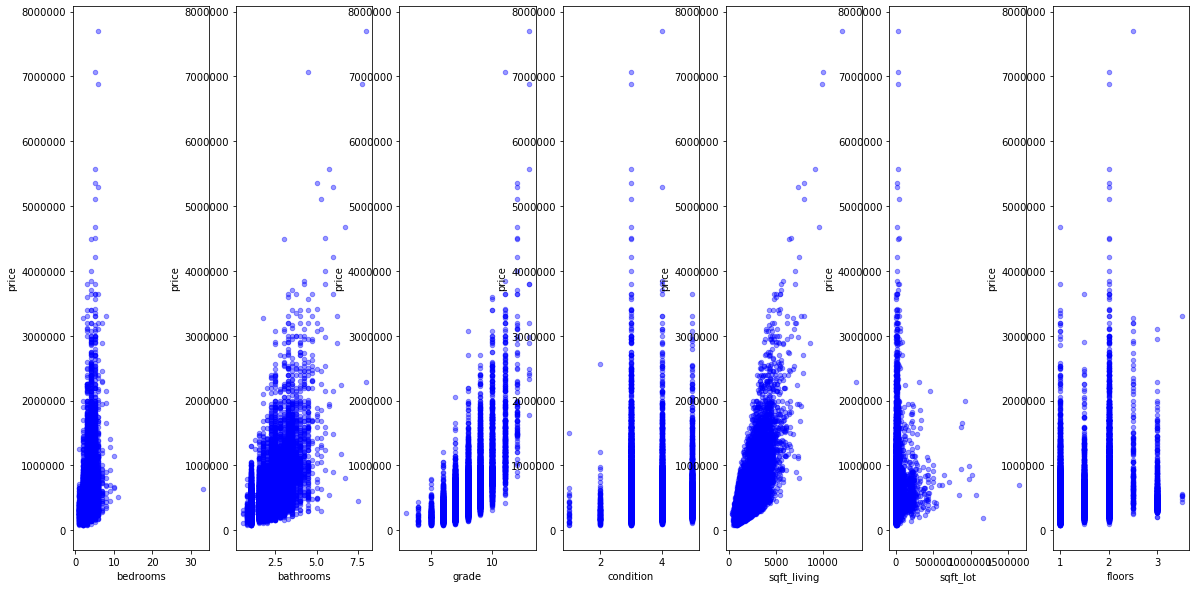

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 7, figsize = (20,10) )
for xcol, ax in zip(['bedrooms', 'bathrooms', 'grade', 'condition', 'sqft_living', 'sqft_lot', 'floors'], axes):
    df.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha = 0.4, color = 'b')

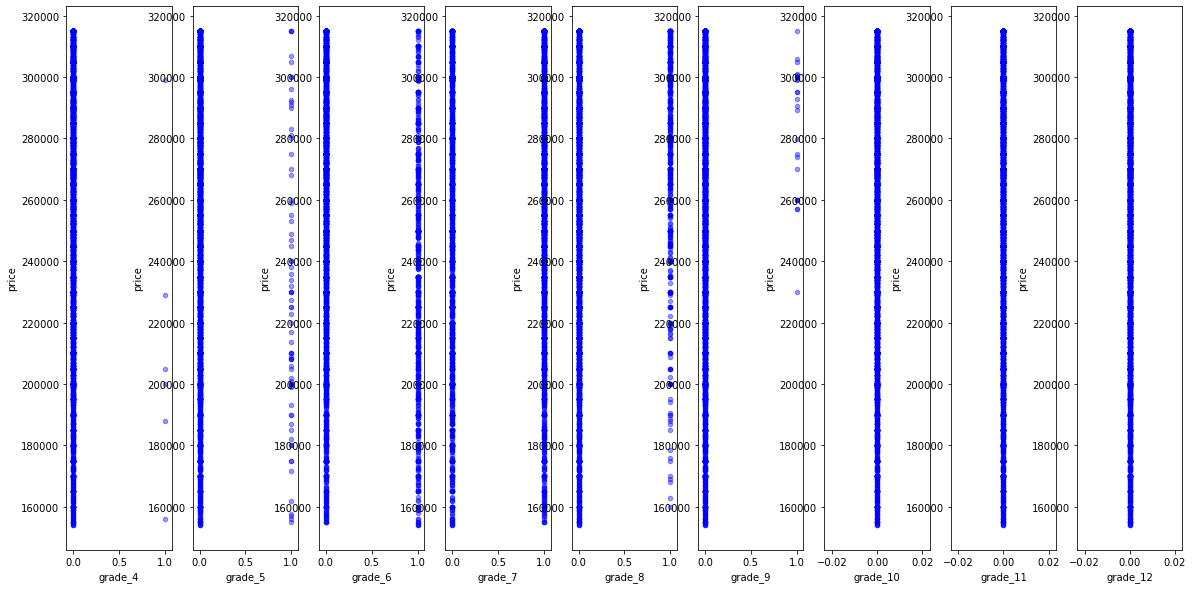

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 9, figsize = (20,10) )
for xcol, ax in zip(['grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'], axes):
    df5.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha = 0.4, color = 'b')

In [39]:
outcome = 'price'
predictors = df.drop(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', \
                             'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price'], axis=1)
pred_sum = "+".join(predictors.columns)
formulanew = outcome + "~" + pred_sum
modelnew = ols(formula= formulanew, data=df).fit()
modelnew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     70.72
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:49:10   Log-Likelihood:            -2.9859e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21218   BIC:                         6.010e+05
Df Model:                         378                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.801e+07   1.58e+06    -36.756      0.000   -6.11e+07   -5.49e+07
date[T.1/12/2015]   2.114e+05   2.49e+05      0.847      0.397   -2.78e+05       7e+05
date[T.1/13/2015]   2.095e+05   2.49e+05      0.840      0.401   -2.79e+05    6.98e+05
date[T.1/14/2015]   1.945e+05   2.49e+05      0.781      0.435   -2.93e+05    6.82e+05
date[T.1/15/2015]   2.217e+05   2.49e+05      0.889      0.374   -2.67e+05     7.1e+05
date[T.1/16/2015]   1.981e+05   2.49e+05      0.796      0.426    -2.9e+05    6.86e+05
date[T.1/17/2015]   1.351e+05   3.49e+05      0.387      0.698   -5.48e+05    8.18e+05
date[T.1/19/2015]   1.544e+05   2.62e+05      0.590      0.555   -3.58e+05    6.67e+05
date[T.1/2/2015]    2.027e+05   2.49e+05      0.813      0.416   -2.86e+05    6.91e+05
date[T.1/20/2015]   1.994e+05   2.49e+05      0.800      0.424   -2.89e+05    6.88e+05
date[T.1/21/2015]    1.99e+05   2.49e+05      0.800      0.424   -2.89e+05    6.87e+05
date[T.1/22/2015]   1.856e+05   2.49e+05      0.745      0.456   -3.03e+05    6.74e+05
date[T.1/23/2015]   2.278e+05   2.49e+05      0.914      0.361   -2.61e+05    7.16e+05
date[T.1/24/2015]  -4.853e+04   2.76e+05     -0.176      0.860   -5.89e+05    4.92e+05
date[T.1/25/2015]   1.439e+05   2.85e+05      0.506      0.613   -4.14e+05    7.02e+05
date[T.1/26/2015]   1.445e+05   2.49e+05      0.580      0.562   -3.44e+05    6.33e+05
date[T.1/27/2015]   2.289e+05   2.49e+05      0.920      0.357   -2.59e+05    7.16e+05
date[T.1/28/2015]   1.847e+05   2.49e+05      0.743      0.458   -3.03e+05    6.72e+05
date[T.1/29/2015]   2.289e+05   2.49e+05      0.918      0.359    -2.6e+05    7.18e+05
date[T.1/30/2015]   3.459e+05    2.5e+05      1.383      0.167   -1.44e+05    8.36e+05
date[T.1/31/2015]   1.259e+05   3.49e+05      0.361      0.718   -5.58e+05    8.09e+05
date[T.1/5/2015]    1.991e+05   2.49e+05      0.801      0.423   -2.88e+05    6.86e+05
date[T.1/6/2015]    2.298e+05    2.5e+05      0.921      0.357   -2.59e+05    7.19e+05
date[T.1/7/2015]    2.627e+05   2.49e+05      1.056      0.291   -2.25e+05     7.5e+05
date[T.1/8/2015]    1.983e+05   2.49e+05      0.796      0.426    -2.9e+05    6.86e+05
date[T.1/9/2015]    2.788e+05    2.5e+05      1.115      0.265   -2.11e+05    7.69e+05
date[T.10/1/2014]   2.596e+05   2.48e+05      1.047      0.295   -2.26e+05    7.46e+05
date[T.10/10/2014]   2.45e+05   2.48e+05      0.988      0.323   -2.41e+05    7.31e+05
date[T.10/11/2014]  1.307e+06   3.02e+05      4.326      0.000    7.15e+05     1.9e+06
date[T.10/12/2014]  2.033e+05   2.85e+05      0.714      0.475   -3.55e+05    7.61e+05
date[T.10/13/2014]  2.829e+05   2.49e+05      1.138      0.255   -2.04e+05     7.7e+05
date[T.10/14/2014]  2.193e+05   2.48e+05      0.884      0.377   -2.67e+05    7.05e+05
date[T.10/15/2014]  2.146e+05   2.48e+

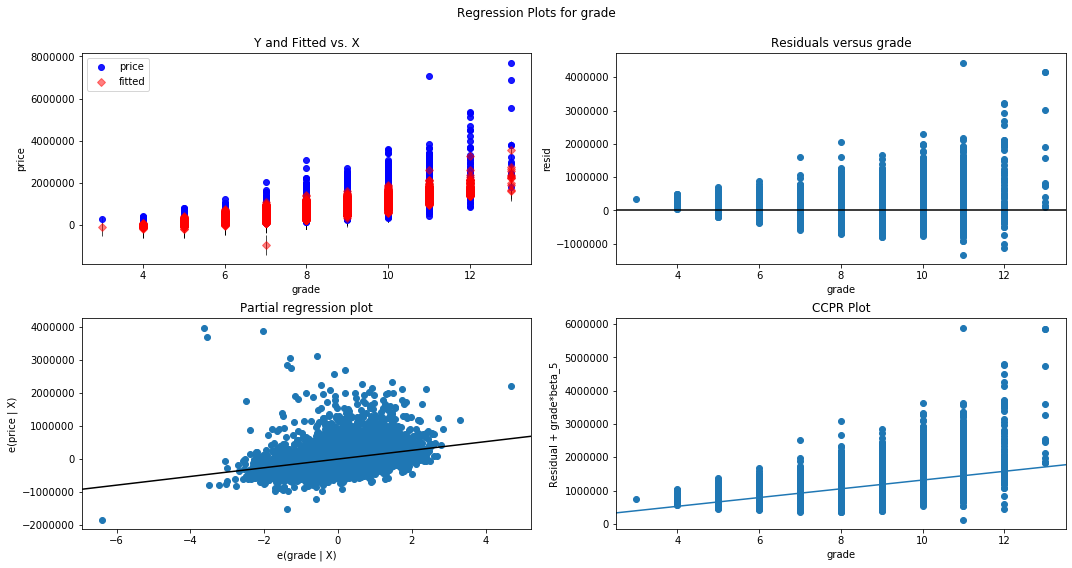

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

In [ ]:
outcome = 'price'
predictors = df5.drop(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', \
                             'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df5).fit()

In [ ]:
df5

In [ ]:
f1 = 'price~grade_8+sqft_living+ sqft_living15+yr_built+bath_0_75+bath_1_0+bath_1_5+bath_1_75+bath_2_0'
model = ols(formula=f1, data=df5).fit()
model.summary()

In [ ]:
dumdf= pd.get_dummies(df['bedrooms'], prefix='br')
dumdf = pd.concat([df, dumdf], axis=1)
dumdf

In [ ]:
dumdf1= pd.get_dummies(df['bathrooms'], prefix='ba')
dumdf2 = pd.concat([dumdf, dumdf1], axis=1)
dumdf2

In [ ]:
dum1= dumdf2.drop(dumdf2.loc[dumdf2['br_6']==0].index, inplace=True)
dum1

In [ ]:
dum1

In [ ]:
df3['bedrooms'].value_counts()

In [ ]:
df1 = df.loc[df['bedrooms'] < 5]
df1['bedrooms'].value_counts()

In [ ]:
df2 = df1.loc[df1['bathrooms'] < 4.01]
df2['bathrooms'].value_counts()

In [ ]:
df3 = df2.loc[df2['bathrooms'] > 0.99]
df3['bathrooms'].value_counts()

In [ ]:
dumdf= pd.get_dummies(df3['bedrooms'], prefix='br')
dumdf = pd.concat([df3, dumdf], axis=1)
dumdf

In [ ]:
dumdf1= pd.get_dummies(df3['bathrooms'], prefix='ba')
df4 = pd.concat([dumdf, dumdf1], axis=1)
df4

In [ ]:
df4= df4.drop(['bedrooms', 'bathrooms'], axis=1)
df4

In [ ]:
f = 'price~grade+sqft_living+yr_built+br_1+br_2+br_3+br_4+ba_1_0+ba_1_25+ba_1_5+ba_1_75+ba_2_0+ba_2_25+ba_2_5+ba_2_75+ba_3_0+ba_3_25+ba_3_5+ba_3_75+ba_4_0'
model = ols(formula=f, data=df4).fit()
model.summary()

In [ ]:
corr = df4.corr()
display(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='rainbow', mask = mask, annot=True, center=0)

In [ ]:
df5 = df4[(df4['price']< 438000) & (df4['price']> 154000)]
df5

In [ ]:
ff = 'price~grade+sqft_living+yr_built+br_1+br_2+br_3+br_4+ba_1_0+ba_1_25+ba_1_5+ba_1_75+ba_2_0+ba_2_25+ba_2_5+ba_2_75+ba_3_0+ba_3_25+ba_3_5+ba_3_75+ba_4_0'
model = ols(formula=ff, data=df5).fit()
model.summary()

In [ ]:
df4.to_csv(r'C:\Users\melfr\Documents\Flatiron\p2\PhaseProject\KingHousing\data\meldf.csv')

In [8]:
df4 = pd.read_csv('meldf.csv')
df4

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19476,21590,7936000429,3/26/2015,1010000.0,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
19477,21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19478,21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19479,21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
# Create an interaction term from 2 variables
df5= df4
df5['brba_comb'] = (df['bedrooms'] * df['bathrooms'])
df5['sqft_perc'] = (df['sqft_living'] / df['sqft_lot'])
df5.head()

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0,brba_comb,sqft_perc
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.208850
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.75,0.354874
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.00,0.077000
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,12.00,0.392000
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.00,0.207921


In [10]:
f = 'price~grade+sqft_living+brba_comb+yr_built+lat'
model = ols(formula=f, data=df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     6823.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:33:47   Log-Likelihood:            -2.6375e+05
No. Observations:               19481   AIC:                         5.275e+05
Df Residuals:                   19475   BIC:                         5.276e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.016e+07   4.92e+05    -40.955      0.000   -2.11e+07   -1.92e+07
grade        1.205e+05   1945.115     61.934      0.000    1.17e+05    1.24e+05
sqft_living   157.5132      2.516     62.598      0.000     152.581     162.445
brba_comb     -56.0062    315.117     -0.178      0.859    -673.662     561.650
yr_built    -2737.8023     52.001    -52.649      0.000   -2839.729   -2635.876
lat          5.223e+05   9711.037     53.787      0.000    5.03e+05    5.41e+05
==============================================================================
Omnibus:                    13653.186   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432728.352
Skew:                           2.971   Prob(JB):                         0.00
Kurtosis:                      25.311   Cond. No.                     1.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df5['lat'].mean()

47.558364154817525

In [ ]:
group46 = []
group47 = []
group45 = []
group44 = []
def latitudesplit():
    for lat in df5['lat']:
        if lat < 47.70 & lat >= 47.60:
            group46.append(lat)
        if lat < 47.80 & lat >= 47.70:
            group47.append(lat)
        if lat < 47.60 & lat >= 47.50:
            group45.append(lat)
        if lat < 47.50 & lat >= 47.40:
            group44.append(lat)
        else:
            None
    print(group46)
    print(group47)
    print(group45)
    print(group44)
        

In [13]:
df5

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0,brba_comb,sqft_perc
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.208850
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.75,0.354874
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.00,0.077000
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,12.00,0.392000
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.00,0.207921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19476,21590,7936000429,3/26/2015,1010000.0,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13.00,0.587248
19477,21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7.50,0.286044
19478,21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.50,0.162338
19479,21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.00,0.106944


In [17]:
df5['latlong'] = str(df5['lat']) + str(df5['long'])
df5

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0,brba_comb,sqft_perc,latlong
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.208850,0 47.5112\n1 47.7210\n2 4...
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.75,0.354874,0 47.5112\n1 47.7210\n2 4...
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.00,0.077000,0 47.5112\n1 47.7210\n2 4...
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,12.00,0.392000,0 47.5112\n1 47.7210\n2 4...
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.00,0.207921,0 47.5112\n1 47.7210\n2 4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19476,21590,7936000429,3/26/2015,1010000.0,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13.00,0.587248,0 47.5112\n1 47.7210\n2 4...
19477,21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7.50,0.286044,0 47.5112\n1 47.7210\n2 4...
19478,21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.50,0.162338,0 47.5112\n1 47.7210\n2 4...
19479,21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.00,0.106944,0 47.5112\n1 47.7210\n2 4...


In [25]:
pd.cut(df5['lat'], bins=6)

0         (47.467, 47.57]
1        (47.674, 47.778]
2        (47.674, 47.778]
3         (47.467, 47.57]
4         (47.57, 47.674]
               ...       
19476     (47.467, 47.57]
19477     (47.57, 47.674]
19478    (47.674, 47.778]
19479     (47.467, 47.57]
19480     (47.467, 47.57]
Name: lat, Length: 19481, dtype: category
Categories (6, interval[float64]): [(47.155, 47.26] < (47.26, 47.363] < (47.363, 47.467] < (47.467, 47.57] < (47.57, 47.674] < (47.674, 47.778]]

In [27]:
df5.head()

,Unnamed: 0,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0,brba_comb,sqft_perc,latlong
0,0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.208850,0 47.5112\n1 47.7210\n2 4...
1,1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.75,0.354874,0 47.5112\n1 47.7210\n2 4...
2,2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.00,0.077000,0 47.5112\n1 47.7210\n2 4...
3,3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,12.00,0.392000,0 47.5112\n1 47.7210\n2 4...
4,4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.00,0.207921,0 47.5112\n1 47.7210\n2 4...


In [ ]:
!pip install jupyterlab "ipywidgets==7.5"
!jupyter labextension install jupyterlab-plotly@4.12.0

In [ ]:
!pip install nodejs
!pip install npm
npm install --save plotlywidget

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
!pip install plotly-geo==1.0.0

In [ ]:
import plotly.express as px
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
import cufflinks as cf
import plotly.offline
import seaborn as sns
import matplotlib.pyplot as plt
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plotly.offline.init_notebook_mode()
py.init_notebook_mode()


fig = px.scatter_mapbox(data_frame=df5, lat=df5['lat'], lon=df5['long'], color="price",
                  color_continuous_scale=px.colors.cyclical.mygbm, size_max=15, zoom=8)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

#fig = go.Figure(data=go.Scattergeo(
        #lon = df4['long'],
        #lat = df4['lat'],
        #mode = 'markers',
        #marker_color = df4['price'],
        #))

#fig.show()